# Player Analysis

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

## Data Cleaning and Exploring

In [3]:
df1 = pd.read_csv("matches.csv")
df2 = pd.read_csv("deliveries.csv")

df1.rename(columns={"id" : 'match_id'}, inplace=True)

matches= pd.merge(df1, df2, on='match_id', how='outer')

In [4]:
matches.columns

Index(['match_id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [5]:
matches = matches[['match_id', 'season','team1', 'team2', 'toss_winner','toss_decision','winner',
       'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman','non_striker', 'bowler','wide_runs','noball_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind']]

matches.shape

(179078, 22)

In [6]:
matches.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
1,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
2,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,4,0,4,NaN,NaN
3,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,NaN,NaN
4,1,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,1,Sunrisers Hyderabad,Royal Challengers Bangalore,...,DA Warner,S Dhawan,TS Mills,2,0,0,2,2,NaN,NaN


### Taking in Consideration only KKR VS MI matches

In [7]:
KKR_MI =matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Mumbai Indians'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Mumbai Indians'))]

In [8]:
KKR_MI.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1424,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kolkata Knight Riders,Mumbai Indians,...,G Gambhir,CA Lynn,SL Malinga,0,0,1,0,1,NaN,NaN
1425,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kolkata Knight Riders,Mumbai Indians,...,CA Lynn,G Gambhir,SL Malinga,1,0,0,1,1,NaN,NaN
1426,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kolkata Knight Riders,Mumbai Indians,...,CA Lynn,G Gambhir,SL Malinga,0,0,1,0,1,NaN,NaN
1427,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kolkata Knight Riders,Mumbai Indians,...,G Gambhir,CA Lynn,SL Malinga,0,0,0,0,0,NaN,NaN
1428,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,1,Kolkata Knight Riders,Mumbai Indians,...,G Gambhir,CA Lynn,SL Malinga,0,0,1,0,1,NaN,NaN


In [9]:
KKR_MI.match_id.unique().shape

(25,)

### Analysis of wicket fall down of MI in 6-15 overs

In [10]:
overs = KKR_MI[(KKR_MI["over"]>6) & (KKR_MI["over"]<=15)]
mumbai = overs[overs["batting_team"]=="Mumbai Indians"]

mumbai.head()

,match_id,season,team1,team2,toss_winner,toss_decision,winner,inning,batting_team,bowling_team,...,batsman,non_striker,bowler,wide_runs,noball_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
1594,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kolkata Knight Riders,...,JC Buttler,PA Patel,SP Narine,0,0,2,0,2,NaN,NaN
1595,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kolkata Knight Riders,...,JC Buttler,PA Patel,SP Narine,0,0,0,0,0,NaN,NaN
1596,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kolkata Knight Riders,...,JC Buttler,PA Patel,SP Narine,0,0,0,0,0,NaN,NaN
1597,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kolkata Knight Riders,...,JC Buttler,PA Patel,SP Narine,0,0,6,0,6,NaN,NaN
1598,7,2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,2,Mumbai Indians,Kolkata Knight Riders,...,JC Buttler,PA Patel,SP Narine,0,0,1,0,1,NaN,NaN


In [11]:
wicket_fall_per = mumbai.groupby(["season","match_id"]).agg({"player_dismissed":"count"})

wicket_fall_per.columns = ["wicket fall"]


print("Wickets loss by MI in 6-15 overs against KKR(season wise) :")
wicket_fall_per

Wickets loss by MI in 6-15 overs against KKR(season wise) :


wicket fall
season match_id             
2008   75                  0
2009   132                 3
       138                 2
2010   191                 2
       230                 2
2011   303                 3
       305                 4
2012   363                 0
       370                 2
2013   413                 2
       434                 2
2014   458                 1
       497                 1
2015   518                 0
       567                 2
2016   581                 2
       600                 3
2017   7                   4
       53                  1
       58                  1
2018   7930                3
       7934                2
2019   11338               3
       11347               1

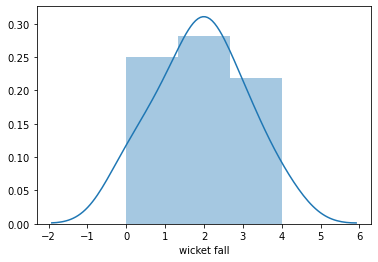

In [12]:
sns.distplot(wicket_fall_per["wicket fall"])

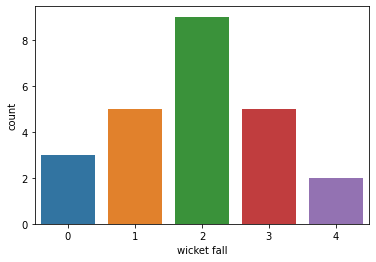

In [13]:
sns.countplot(wicket_fall_per["wicket fall"])

From both the histogram and barplot we can se that we got a almost normal distribution curve . Also , we can see the longest peak at 2 wicket fall down.


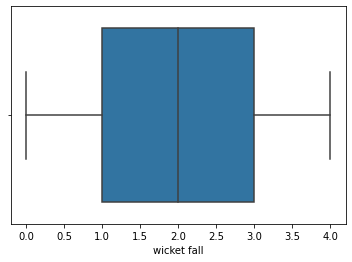

In [14]:
sns.boxplot(wicket_fall_per["wicket fall"])

So , no outliers as such present in the data

In [15]:
print("Average no of wickets loss by MI in 6-15 over against KKR :",round(wicket_fall_per["wicket fall"].mean()))

Average no of wickets loss by MI in 6-15 over against KKR : 2


### Confidence Interval Calculation

In [16]:
wicket_fall_per.describe().T

,count,mean,std,min,25%,50%,75%,max
wicket fall,24.0,1.916667,1.138904,0.0,1.0,2.0,3.0,4.0


In [17]:
mean = wicket_fall_per["wicket fall"].mean()
sd = wicket_fall_per["wicket fall"].std()
n = len(wicket_fall_per)

n

24

In [18]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.23247772736287398

In [19]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for wickets that MI can loose in 6-15 over against KKR :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for wickets that MI can loose in 6-15 over against KKR :(1.0, 2.0)


### Rohit Sharma dismissal type Analysis

In [20]:
rohit = KKR_MI[KKR_MI["batsman"]=='RG Sharma']
batsmen_score = pd.DataFrame(rohit.groupby(['season',"match_id","inning","batsman"]).agg({'batsman_runs' : 'sum', 'ball' :'count' , "player_dismissed":"count" }))
batsmen_score

batsman_runs  ball  player_dismissed
season match_id inning batsman                                        
2011   303      2      RG Sharma            10     9                 1
2012   363      1      RG Sharma           109    62                 0
       370      2      RG Sharma            12    14                 1
2013   413      2      RG Sharma            34    28                 1
       434      1      RG Sharma            16    11                 1
2014   458      2      RG Sharma            27    20                 1
       497      1      RG Sharma            51    46                 1
2015   518      1      RG Sharma            98    66                 0
       567      1      RG Sharma            30    22                 1
2016   581      2      RG Sharma            84    55                 0
       600      2      RG Sharma            68    49                 0
2017   7        2      RG Sharma             2     6                 1
       53       1      RG Sharma            27    22                 1
       58       2      RG Sharma            26    24                 1
2018   7930     1      RG Sharma            11    11                 1
       7934     1      RG Sharma            38    32                 1
2019   11338    2      RG Sharma            12     9                 1
       11347    2      RG Sharma            56    49                 0

From the above dataframe we can observe that out of 18 innings Rohit had played against KKR , he had been out 13 times.

Also we can observe that most of the time he was out when he has scored in run per ball pattern and his scores also lied below 30 for majority time, which indicates that he faces difficulty playing initially when he has played under 30 balls.  

In [21]:
rohit_dismiss = rohit[rohit["player_dismissed"]=="RG Sharma"]

rohit_dis = rohit_dismiss.groupby(["bowler"])["player_dismissed"].count()
dismissal = pd.DataFrame(rohit_dis)

print("Rohit Sharma dismissal against KKR bowlers :")
dismissal

Rohit Sharma dismissal against KKR bowlers :


,player_dismissed
bowler,
AS Rajpoot,1
H Gurney,1
M Morkel,1
NM Coulter-Nile,1
P Krishna,1
R Bhatia,1
R McLaren,1
SP Narine,6


From here we get an idea that Rohit had been dismissed majority of times by pacers.

We can also see dominancy of Sunil Naraine in getting Rohit OUT , where he was able to dismiss him 6 times.


In [22]:
rohit_diss_k = rohit_dismiss.groupby(["bowler","inning","dismissal_kind"])["dismissal_kind"].count()
dismissal_kind_inning_wise = pd.DataFrame(rohit_diss_k)

print("Inning wise Dismissal :")
dismissal_kind_inning_wise

Inning wise Dismissal :


dismissal_kind
bowler          inning dismissal_kind                   
AS Rajpoot      1      lbw                             1
H Gurney        2      lbw                             1
M Morkel        2      caught                          1
NM Coulter-Nile 2      caught                          1
P Krishna       1      caught                          1
R Bhatia        2      caught                          1
R McLaren       1      caught                          1
SP Narine       1      bowled                          2
                       caught                          1
                2      caught                          1
                       caught and bowled               1
                       lbw                             1

In [23]:
rohit_diss_kind = rohit_dismiss.groupby(["dismissal_kind"])["dismissal_kind"].count()
dismissal_kind = pd.DataFrame(rohit_diss_kind)

dismissal_kind

,dismissal_kind
dismissal_kind,
bowled,2
caught,7
caught and bowled,1
lbw,3


From all the analysis above we can conclude that Rohit had faced problem against pacers while batting initially (i.e when he had played balls less then 30) and also Sunil Naraine has troubled him a lot .

Analysing his performance , dismissal time , inning wise dismissal , dismissal type etc we can conclude that there are more chances of him to get out by caugth out.

###  Analysis of Total Runs that can be scored in the match

In [24]:
Each_team_overall_score = pd.DataFrame(KKR_MI.groupby("batting_team")["total_runs"].sum())

Each_team_overall_score.columns=["Total Runs"]

print('Overall score for each team :')
Each_team_overall_score

Overall score for each team :


,Total Runs
batting_team,
Kolkata Knight Riders,3730
Mumbai Indians,3955


In [25]:
count = KKR_MI.match_id.unique()
count = len(count)

Total_runs_scored = KKR_MI.total_runs.sum()

Avg_score = Total_runs_scored/(count*2)

print("On an average runs scored in each innnings in KKR VS MI :",round(Avg_score))

On an average runs scored in each innnings in KKR VS MI : 154.0


In [26]:
Total_avg = Total_runs_scored/count

print("On an average total runs scored in a match of KKR VS MI :" , round(Total_avg))

On an average total runs scored in a match of KKR VS MI : 307.0


In [27]:
runs_scored_per_match = pd.DataFrame(KKR_MI.groupby(["season","match_id"])["total_runs"].sum())

print("Total Runs scored in per match of KKR VS MI :")
runs_scored_per_match

Total Runs scored in per match of KKR VS MI :


total_runs
season match_id            
2008   75               275
       99               135
2009   132              282
       138              287
2010   191              311
       230              268
2011   303              353
       305              295
2012   363              337
       370              248
2013   413              321
       434              275
2014   458              285
       497              283
2015   518              338
       567              337
2016   581              375
       600              352
2017   7                358
       53               337
       58               218
2018   7930             364
       7934             326
2019   11338            445
       11347            280

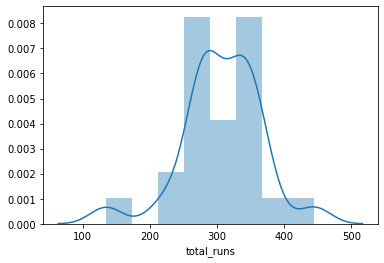

In [28]:
sns.distplot(runs_scored_per_match["total_runs"])

The curve is somewhat similar to a Normal Distribution curve , we can also observe few possible outliers along both the edges but we need to confirm the presence of outliers first before coming to any conclusion.

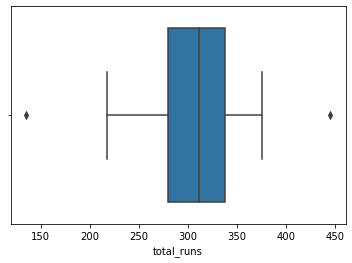

In [29]:
sns.boxplot(runs_scored_per_match["total_runs"])

We can see 1-2 outliers in our data 

#### Outliers Removal 

In [30]:
runs_scored_per_match['z_score']=stats.zscore(runs_scored_per_match["total_runs"])


runs_scored_per_match

total_runs   z_score
season match_id                      
2008   75               275 -0.554346
       99               135 -2.949669
2009   132              282 -0.434580
       138              287 -0.349033
2010   191              311  0.061594
       230              268 -0.674112
2011   303              353  0.780191
       305              295 -0.212157
2012   363              337  0.506440
       370              248 -1.016301
2013   413              321  0.232688
       434              275 -0.554346
2014   458              285 -0.383252
       497              283 -0.417471
2015   518              338  0.523549
       567              337  0.506440
2016   581              375  1.156599
       600              352  0.763081
2017   7                358  0.865738
       53               337  0.506440
       58               218 -1.529585
2018   7930             364  0.968395
       7934             326  0.318236
2019   11338            445  2.354260
       11347            280 -0.468799

From the above dataframe we can see that for most of the data values z-score lies between (-1,1) except at some points where value of z-score is +/- 2. So these points can be considered as the outliers(far points) 

Outliers Removal :

In [31]:
runs_scored_per_match = runs_scored_per_match.loc[(runs_scored_per_match['z_score'].abs()<=2) & (runs_scored_per_match['z_score'].abs()>=-2)]

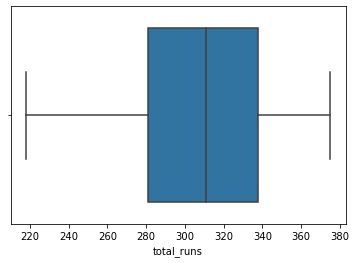

In [32]:
sns.boxplot(runs_scored_per_match["total_runs"])

### Confidence Interval Calculation

In [33]:
mean = runs_scored_per_match["total_runs"].mean()
sd = runs_scored_per_match["total_runs"].std()
n = len(runs_scored_per_match)

n

23

In [34]:
tstar = 2.064
se = sd/np.sqrt(n)
se

8.515717401346635

In [35]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total runs that can be scored(in total) in today's match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total runs that can be scored(in total) in today's match :(291.0, 326.0)


### Analysis of total no of fours that KKR can score

In [36]:
KKR = KKR_MI[KKR_MI["batting_team"]=="Kolkata Knight Riders"]
four_only = KKR[KKR["batsman_runs"]==4]

In [37]:
per_match_fours = pd.DataFrame(four_only.groupby(["match_id"])["batsman_runs"].count())
 
per_match_fours.columns = ["fours count"]

print("Per match fours scored by KKR against MI:")
per_match_fours

Per match fours scored by KKR against MI:


,fours count
match_id,
7,14
53,14
58,8
75,15
99,7
132,8
138,10
191,15
230,13


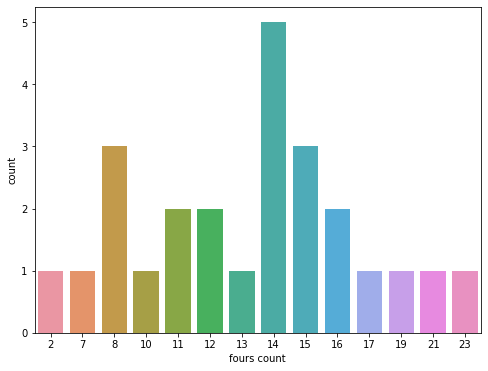

In [38]:
plt.figure(figsize = (8,6))
sns.countplot(per_match_fours["fours count"])

From the plot above we can see the longest peak at 14 fours 

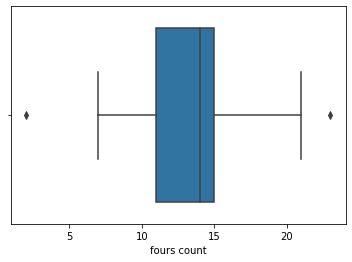

In [39]:
sns.boxplot(per_match_fours["fours count"])

We can see 1-2 outliers in our data

#### Outlier Removal 

In [40]:
per_match_fours['z_score']=stats.zscore(per_match_fours["fours count"])

per_match_fours

,fours count,z_score
match_id,,
7,14,0.187575
53,14,0.187575
58,8,-1.152245
75,15,0.410878
99,7,-1.375548
132,8,-1.152245
138,10,-0.705638
191,15,0.410878
230,13,-0.035729


From the above dataframe we can see that for most of the data value's z-score lies between (-1,1) except at some points where value of z-score is +/- 2. So these points can be considered as the outliers(far points) 

In [41]:
per_match_fours = per_match_fours.loc[(per_match_fours['z_score'].abs()<=2) & (per_match_fours['z_score'].abs()>=-2)]

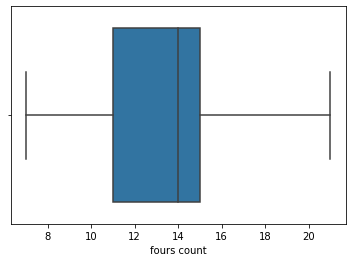

In [42]:
sns.boxplot(per_match_fours["fours count"])

In [43]:
print("Average no. of fours KKR has scored per match against MI :",round(per_match_fours["fours count"].mean()))

Average no. of fours KKR has scored per match against MI : 13


### Confidence Interval Calculation 

In [47]:
mean = per_match_fours["fours count"].mean()
sd = per_match_fours["fours count"].std()
n = len(per_match_fours)

n

23

In [48]:
tstar = 2.064
se = sd/np.sqrt(n)
se

0.7437659799701718

In [49]:
lcb = mean - tstar * se
ucb = mean + tstar * se
lcb = round(lcb)
ucb = round(ucb)

print("So , our 95% Confidence Interval for Total fours that can be scored by KKR in the match :{}".format((lcb, ucb)))

So , our 95% Confidence Interval for Total fours that can be scored by KKR in the match :(12.0, 15.0)
